#  Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import cv2
import csv
import tensorflow as tf
import mediapipe as mp

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [7]:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence = 0.8, min_tracking_confidence = 0.8) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        #converting BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = pose.process(image)
        
        #recolor back
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color = (255,255,255), thickness = 2, circle_radius=1),
                                 mp_drawing.DrawingSpec(color = (255,255,0), thickness = 2, circle_radius = 2))
        
        cv2.imshow('Exercise', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [8]:
num_coords = len(results.pose_landmarks.landmark)
num_coords

33

In [9]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks+=['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]
for val in range(34, 34+8):
    landmarks+=['A{}'.format(val-33)]

In [3]:
def calculate_angle(a,b,c):
    a=np.array(a)
    b=np.array(b)
    c=np.array(c)
    
    radians = np.arctan2(c[1]-b[1],c[0]-b[0]) - np.arctan2(a[1]-b[1],a[0]-b[0])
    angle=np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
    
    return angle

In [11]:
# Opening the file
with open('CEVII.csv', mode = 'w', newline = '') as f:
    csv_writer = csv.writer(f, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

# Creating Datasets

In [ ]:
class_name = "PushUps"

In [ ]:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence = 0.8, min_tracking_confidence = 0.8) as posee:
    while cap.isOpened():
        ret, frame = cap.read()
        
        #converting BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        results = posee.process(image)
        
        #recolor back
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #draw landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color = (255,255,255), thickness = 2, circle_radius=1),
                                 mp_drawing.DrawingSpec(color = (255,255,0), thickness = 2, circle_radius = 2))
        
        
        
        try:
            angles = cal_angles()
            pose = results.pose_landmarks.landmark
            row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in pose]).flatten())
            
            row += angles
            row.insert(0, class_name)
            
            with open('CEVII.csv', mode = 'a', newline = '') as f:
                csv_writer = csv.writer(f, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
                csv_writer.writerow(row)
                
        except:
            pass
            
            
        cv2.imshow('Exercise', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [4]:
def cal_angles(landmarks):
    landmarks = results.pose_landmarks.landmark
    
    ls = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    rs = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

    le = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    re = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]

    lw = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
    rw = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

    lh = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    rh = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]

    lk = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    rk = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]

    la = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
    ra = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

                
                
                #Left hand angle/13th
    angles = [calculate_angle(ls,le,lw), calculate_angle(rs,re,rw), calculate_angle(le,ls,lh), calculate_angle(re,rs,rh),
              calculate_angle(rh,rk,ra),calculate_angle(lh,lk,la), calculate_angle(ls,lh,lk), calculate_angle(rs,rh,rk)]

#                 #right hand angle/14th
#                 rhanda = calculate_angle(rs,re,rw)
                
#                 # left shoulder angle/11th
#                 lshouldera = calculate_angle(le,ls,lh)
                
#                 # right shoulder angle/12th
#                 rshouldera = calculate_angle(re,rs,rh)
                
#                 # right leg angle/26th
#                 rlega = calculate_angle(rh,rk,ra)
                
#                 # left leg angle/25th
#                 llega = calculate_angle(lh,lk,la)
                
#                 # left hip angle/23rd
#                 lhipa = calculate_angle(ls,lh,lk)
                
#                 # right hip angle/24th
#                 rhipa = calculate_angle(rs,rh,rk)
                
    return angles

# Extracting data from CSV to Pandas Dataframe

In [5]:
df = pd.read_csv("CEVI2.csv")
df.head()

,classed,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,y33,z33,A1,A2,A3,A4,A5,A6,A7,A8
0,lunges,0.375140,0.366302,-0.002710,0.369248,0.355232,0.011720,0.368186,0.354934,0.011766,...,0.810125,-0.022348,125.113864,117.301780,17.365454,27.609158,98.050940,99.247953,172.756898,106.558356
1,lunges,0.371450,0.365952,-0.005700,0.365491,0.354565,0.008465,0.364397,0.354220,0.008511,...,0.810140,-0.006010,126.711037,119.433106,16.781966,25.823022,98.945887,99.277704,173.089117,106.287879
2,lunges,0.369216,0.364465,-0.006156,0.362911,0.353157,0.007764,0.361792,0.352775,0.007812,...,0.810904,-0.009321,127.751084,119.758679,16.506078,25.484878,99.730310,99.632449,173.375926,107.011162
3,lunges,0.377259,0.353289,-0.001079,0.371428,0.341200,0.013093,0.370303,0.340980,0.013144,...,0.811840,-0.029050,121.954798,114.489100,19.892014,27.578208,97.928908,100.832694,169.485794,107.715799
4,lunges,0.390199,0.340179,0.001722,0.383578,0.328456,0.016191,0.382382,0.328547,0.016233,...,0.811278,-0.032875,120.152939,114.453955,20.759404,27.676385,95.221128,102.752793,168.634658,105.150726


In [6]:
# Dropping the angles
df.drop(df.iloc[:,100:], inplace = True, axis=1)
df

,classed,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,lunges,0.375140,0.366302,-0.002710,0.369248,0.355232,0.011720,0.368186,0.354934,0.011766,...,0.120542,0.441167,0.809704,-0.012663,0.222185,0.802200,0.098078,0.499090,0.810125,-0.022348
1,lunges,0.371450,0.365952,-0.005700,0.365491,0.354565,0.008465,0.364397,0.354220,0.008511,...,0.122606,0.440457,0.809688,0.000650,0.220159,0.802948,0.102906,0.499027,0.810140,-0.006010
2,lunges,0.369216,0.364465,-0.006156,0.362911,0.353157,0.007764,0.361792,0.352775,0.007812,...,0.138424,0.439839,0.810888,-0.001415,0.218197,0.804284,0.120269,0.498923,0.810904,-0.009321
3,lunges,0.377259,0.353289,-0.001079,0.371428,0.341200,0.013093,0.370303,0.340980,0.013144,...,0.153299,0.456854,0.810747,-0.025250,0.228339,0.805464,0.140062,0.520068,0.811840,-0.029050
4,lunges,0.390199,0.340179,0.001722,0.383578,0.328456,0.016191,0.382382,0.328547,0.016233,...,0.167441,0.474087,0.807228,-0.028489,0.242031,0.805242,0.154361,0.535254,0.811278,-0.032875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14014,PushUps,0.695071,0.621896,-0.023561,0.703143,0.602503,-0.005921,0.702596,0.600876,-0.005882,...,0.232862,0.089371,0.779592,-0.087921,0.144410,0.844310,0.157486,0.128036,0.869368,-0.201255
14015,PushUps,0.695201,0.599583,-0.019629,0.702313,0.579115,-0.002258,0.701567,0.577403,-0.002229,...,0.228260,0.089661,0.780016,-0.084739,0.144484,0.844485,0.152518,0.129264,0.867920,-0.197678
14016,PushUps,0.692619,0.591667,-0.041868,0.699654,0.571182,-0.025013,0.698902,0.569628,-0.024989,...,0.259157,0.089869,0.781406,-0.056804,0.144068,0.844686,0.186262,0.129641,0.867888,-0.166963
14017,PushUps,0.690892,0.587303,-0.034541,0.697518,0.566698,-0.017549,0.696794,0.565230,-0.017520,...,0.265426,0.089195,0.782080,-0.054907,0.143954,0.844819,0.194634,0.130336,0.867899,-0.164014


In [7]:
# Dropping the class column
X = df.drop('classed',axis = 1)
y = df['classed']
X.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z30,x31,y31,z31,x32,y32,z32,x33,y33,z33
0,0.375140,0.366302,-0.002710,0.369248,0.355232,0.011720,0.368186,0.354934,0.011766,0.366900,...,0.120542,0.441167,0.809704,-0.012663,0.222185,0.802200,0.098078,0.499090,0.810125,-0.022348
1,0.371450,0.365952,-0.005700,0.365491,0.354565,0.008465,0.364397,0.354220,0.008511,0.363131,...,0.122606,0.440457,0.809688,0.000650,0.220159,0.802948,0.102906,0.499027,0.810140,-0.006010
2,0.369216,0.364465,-0.006156,0.362911,0.353157,0.007764,0.361792,0.352775,0.007812,0.360516,...,0.138424,0.439839,0.810888,-0.001415,0.218197,0.804284,0.120269,0.498923,0.810904,-0.009321
3,0.377259,0.353289,-0.001079,0.371428,0.341200,0.013093,0.370303,0.340980,0.013144,0.368988,...,0.153299,0.456854,0.810747,-0.025250,0.228339,0.805464,0.140062,0.520068,0.811840,-0.029050
4,0.390199,0.340179,0.001722,0.383578,0.328456,0.016191,0.382382,0.328547,0.016233,0.380924,...,0.167441,0.474087,0.807228,-0.028489,0.242031,0.805242,0.154361,0.535254,0.811278,-0.032875


In [8]:
#Checking if any null values present in the datasets
check_for_nan = df.isnull().values.any()
check_for_nan

False

In [9]:
y.head()

0    lunges
1    lunges
2    lunges
3    lunges
4    lunges
Name: classed, dtype: object

In [10]:
#Getting dummy values for classes 
y = pd.get_dummies(df.classed, prefix='classes')
print(y.head())

   classes_PushUps  classes_Squats  classes_kneecrunches  classes_leglifts  \
0                0               0                     0                 0   
1                0               0                     0                 0   
2                0               0                     0                 0   
3                0               0                     0                 0   
4                0               0                     0                 0   

   classes_lunges  classes_planks  classes_sideplanks  
0               1               0                   0  
1               1               0                   0  
2               1               0                   0  
3               1               0                   0  
4               1               0                   0  


In [11]:
#Converting input labels into binary values
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(df.classed)
y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [12]:
#Splitting the data samples into Training and Testing samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [13]:
# Shape of X training samples
print(X_train.shape)

# Shape of Y training samples
print(y_train.shape)

# Shape of X testing samples
print(X_test.shape)

# Shape of Y training samples
print(y_test.shape)

(9813, 99)
(9813, 7)
(4206, 99)
(4206, 7)


# Training a Deep neural network model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(99,)),
        Dense(units = 25, activation = 'relu'),
        Dense(units = 15, activation = 'relu'),
        Dense(units = 7, activation = 'softmax'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 99)                0         
                                                                 
 dense (Dense)               (None, 25)                2500      
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 7)                 112       
                                                                 
Total params: 3,002
Trainable params: 3,002
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)


In [17]:
#Fitting a model

fit=model.fit(
    X_train, y_train, 
    epochs = 50)

Epoch 1/50
307/307 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.8297
Epoch 2/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9918
Epoch 3/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0222 - accuracy: 0.9962
Epoch 4/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0126 - accuracy: 0.9983
Epoch 5/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0083 - accuracy: 0.9988
Epoch 6/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0065 - accuracy: 0.9991
Epoch 7/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0048 - accuracy: 0.9995
Epoch 8/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0041 - accuracy: 0.9993
Epoch 9/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 10/50
307/307 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9993

In [18]:
# predicting

array=model.predict(X_test)

132/132 [==============================] - 0s 2ms/step


# Predicting in Real-Time 

In [21]:
out = ''
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_pose.Pose(min_detection_confidence=0.8, min_tracking_confidence=0.8) as posee:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = posee.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                  mp_drawing.DrawingSpec(color = (245,117,66), thickness = 1, circle_radius = 1),
#                                  mp_drawing.DrawingSpec(color = (245,66,230), thickness = 1, circle_radius = 1))
         
        
        #Export coordinates
        try:
            #Extract Pose Landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in pose]).flatten())
            
#             #Extract Face Landmarks
#             face = results.face_landmarks.landmark
#             face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
        
            #Concate rows
            row = pose_row 
            
            angle=cal_angles(pose)
            
    
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)

            body_language_class = body_language_class.tolist()
            
            if body_language_class[0].index(max(body_language_class[0]))==0: 
                out = 'PushUps'
                if (angle[0] >= 160 and angle[0] <= 180) and  (angle[1] >= 160 and angle[1] <= 180) \
                    and (angle[2] >= 60 and angle[2] <= 80) \
                    and (angle[3] >= 60 and angle[3] <= 80) \
                    and  (angle[4] >= 160 and angle[4] <= 180) and  (angle[5] >= 160 and angle[5] <= 180) \
                    and  (angle[6] >= 160 and angle[6] <= 180) and  (angle[7] >= 160 and angle[7] <= 180):
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
                
                
                #pose2
                elif (angle[0] >= 80 and angle[0] <= 100) and  (angle[1] >= 80 and angle[1] <= 100) \
                    or (angle[2] >= 10 and angle[2] <= 50) \
                    or (angle[3] >= 10 and angle[3] <= 50) \
                    or  (angle[4] >= 160 and angle[4] <= 180) and  (angle[5] >= 160 and angle[5] <= 180) \
                    and  (angle[6] >= 160 and angle[6] <= 180) and  (angle[7] >= 160 and angle[7] <= 180):
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
                else:
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius = 2))
                    
               
                
            elif body_language_class[0].index(max(body_language_class[0]))==1:
                out = 'Squats'
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
                
            elif body_language_class[0].index(max(body_language_class[0]))==2: 
                out = 'KneeCrunches'
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
                
            elif body_language_class[0].index(max(body_language_class[0]))==3: 
                out = 'leglift'
                if ((angle[6] >= 80 and angle[6] <= 90) or  (angle[7] >= 80 and angle[7] <= 90))\
                or ((angle[5] >= 170 and angle[5] <= 180) or  (angle[4] >= 170 and angle[4] <= 180) \
                    or  (angle[0] >= 170 and angle[0] <= 180)or  (angle[1] >= 170 and angle[1] <= 180)):
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
                
                
                else:
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius = 2))
                    
             
                
                
            elif body_language_class[0].index(max(body_language_class[0]))==4:
                out = 'lunges'
                if (((angle[5] >= 70 and angle[5] <= 90) or  (angle[4] >= 90 and angle[4] <= 120)) or ((angle[7] >= 170 and angle[7] <= 200) and  (angle[6] >= 80 and angle[6] <= 100)) or ((angle[5] >= 90 and angle[5] <= 120) and  (angle[4] >= 70 and angle[4] <= 90)) and ((angle[7] >= 80 and angle[7] <= 100) and  (angle[6] >= 170 and angle[6] <= 200))):
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
#                 elif :
#                     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                      mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
#                                      mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
                else:
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius = 2))
                
                
            elif body_language_class[0].index(max(body_language_class[0]))==5: 
                out = 'planks'
                if (angle[0] >= 80 and angle[0] <= 100) and  (angle[1] >= 80 and angle[1] <= 100) \
                    and  (angle[5] >= 150 and angle[5] <= 200) and  (angle[4] >= 150 and angle[4] <= 200) \
                    and  (angle[6] >= 150 and angle[6] <= 200) and  (angle[7] >= 150 and angle[7] <= 200):
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
                else:
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius = 2))
                    
                
                
                
            elif body_language_class[0].index(max(body_language_class[0]))==6: 
                out = 'sideplanks'
                if (((angle[0] >= 80 and angle[0] <= 100) or  (angle[1] >= 80 and angle[1] <= 100)\
                or (angle[0] >= 170 and angle[5] <= 180)or (angle[1] >= 170 and angle[1] <= 180)) and  (angle[5] >= 160 and angle[5] <= 180) \
                    and  (angle[4] >= 150 and angle[4] <= 180) and  (angle[6] >= 150 and angle[6] <= 200) and  (angle[7] >= 150 and angle[7] <= 200)):
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius = 2))
                
                
                else:
                    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                     mp_drawing.DrawingSpec(color=(0,0,0), thickness=2, circle_radius = 2),
                                     mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius = 2))
                    
                
                
                
            else: out='None'
                
            coords = tuple(np.multiply(
            np.array((results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x,
                    results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y))
                          ,[640,480]).astype(int))
            
            cv2.rectangle(image,
                         (coords[0], coords[1]+5),
                         (coords[0]+len(out)*20, coords[1]-30),
                         (245,117,16),-1)
            
            cv2.putText(image, out, coords,
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
            
            print(out)
                
        except:
            print('f')
            pass
            
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
1/1 [==============================] - 0s 8ms/step
Squats
1/1 [==============================] - 0s 20ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 20ms/step
Squats
1/1 [==============================] - 0s 24ms/step
Squats
1/1 [==============================] - 0s 24ms/step
Squats
1/1 [==============================] - 0s 18ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 47ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 37ms/step
Squats
1/1 [==============================] - 0s 11ms/step
Squats
1/1 [==============================] - 0s 15ms/step
Squats
1/1 [==============================] - 0s 28ms/step
Squats
1/1 [==============================] - 0s 9ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step

1/1 [==============================] - 0s 17ms/step
Squats
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 38ms/step
Squats
1/1 [==============================] - 0s 31ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 26ms/step
sideplanks
1/1 [==============================] - 0s 9ms/step
sideplanks
1/1 [==============================] - 0s 26ms/step
sideplanks
1/1 [==============================] - 0s 17ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 25ms/step
sideplanks
1/1 [==============================] - 0s 24ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 0s/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1

1/1 [==============================] - 0s 19ms/step
Squats
1/1 [==============================] - 0s 28ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 9ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 11ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 19ms/step
Squats
f
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 4ms/step
Squats
1/1 [==============================] - 0s 15ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 23ms/step
Squats
1/1 [==============================] - 0s 21ms/step
Squats
1/1 [==============================] - 0s 15ms/step
Squa

1/1 [==============================] - 0s 21ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 25ms/step
sideplanks
1/1 [==============================] - 0s 26ms/step
sideplanks
1/1 [==============================] - 0s 17ms/step
sideplanks
1/1 [==============================] - 0s 21ms/step
sideplanks
1/1 [==============================] - 0s 20ms/step
sideplanks
1/1 [==============================] - 0s 24ms/step
sideplanks
1/1 [==============================] - 0s 28ms/step
sideplanks
1/1 [==============================] - 0s 22ms/step
sideplanks
1/1 [==============================] - 0s 25ms/step
sideplanks
1/1 [==============================] - 0s 15ms/step
sideplanks
1/1 [==============================] - 0s 23ms/step
sideplanks
1/1 [==============================] - 0s 32ms/step
sideplanks
1/1 [==============================] - 0s 27ms/step
sideplanks
1/1 [==============================] - 0s 28ms/step
sid

1/1 [==============================] - 0s 10ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 24ms/step
sideplanks
1/1 [==============================] - 0s 32ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 20ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 17ms/step
Squats
1/1 [==============================] - 0s 34ms/step
Squats
1/1 [==============================] - 0s 19ms/step
Squats
1/1 [==============================] - 0s 24ms/step
Squats
1/1 [==============================] - 0s 29ms/step
Squats
1/1 [==============================] - 0

1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 25ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 8ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
PushUps
1/1 [==============================] - 0s 28ms/step
Squats
1/1 [==============================] - 0s 35ms/step
Squats
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 27ms/step
sideplanks
1/1 [===================

1/1 [==============================] - 0s 17ms/step
lunges
1/1 [==============================] - 0s 8ms/step
lunges
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 0s/step
sideplanks
1/1 [==============================] - 0s 21ms/step
Squats
1/1 [==============================] - 0s 16ms/step
lunges
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 22ms/step
lunges
1/1 [==============================] - 0s 8ms/step
lunges
1/1 [==============================] - 0s 25ms/step
sideplanks
1/1 [==============================] - 0s 13ms/step
lunges
1/1 [==============================] - 0s 0s/step
lunges
1/1 [==============================] - 0s 21ms/step
lunges
1/1 [==============================] - 0s 13ms/step
lunges
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 16ms/ste

1/1 [==============================] - 0s 19ms/step
sideplanks
1/1 [==============================] - 0s 21ms/step
sideplanks
1/1 [==============================] - 0s 23ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
sideplanks
1/1 [==============================] - 0s 15ms/step
sideplanks
1/1 [==============================] - 0s 33ms/step
sideplanks
1/1 [==============================] - 0s 3ms/step
sideplanks
1/1 [==============================] - 0s 24ms/step
sideplanks
1/1 [==============================] - 0s 16ms/step
lunges
1/1 [==============================] - 0s 19ms/step
lunges
1/1 [==============================] - 0s 32ms/step
lunges
1/1 [==============================] - 0s 16ms/step
lunges
1/1 [==============================] - 0s 20ms/step
lunges
1/1 [==============================] - 0s 46ms/step
PushUps
1/1 [==============================] - 0s 8ms/step
lunges
1/1 [==============================] - 0s 20ms/step
PushUps
1/1 [===================

1/1 [==============================] - 0s 12ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 8ms/step
Squats
1/1 [==============================] - 0s 19ms/step
Squats
1/1 [==============================] - 0s 28ms/step
Squats
1/1 [==============================] - 0s 11ms/step
Squats
1/1 [==============================] - 0s 30ms/step
Squats
1/1 [==============================] - 0s 17ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 18ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 16ms/step
Squats
1/1 [==============================] - 0s 22ms/step
Squat

1/1 [==============================] - 0s 18ms/step
sideplanks
1/1 [==============================] - 0s 22ms/step
sideplanks
1/1 [==============================] - 0s 25ms/step
sideplanks
1/1 [==============================] - 0s 34ms/step
sideplanks
1/1 [==============================] - 0s 24ms/step
sideplanks
1/1 [==============================] - 0s 25ms/step
sideplanks
1/1 [==============================] - 0s 31ms/step
sideplanks
1/1 [==============================] - 0s 39ms/step
sideplanks
1/1 [==============================] - 0s 19ms/step
sideplanks
1/1 [==============================] - 0s 27ms/step
sideplanks
1/1 [==============================] - 0s 24ms/step
sideplanks
1/1 [==============================] - 0s 25ms/step
sideplanks
1/1 [==============================] - 0s 17ms/step
sideplanks
1/1 [==============================] - 0s 26ms/step
sideplanks
1/1 [==============================] - 0s 30ms/step
sideplanks
1/1 [==============================] - 0s 32ms/step
sid

1/1 [==============================] - 0s 53ms/step
lunges
1/1 [==============================] - 0s 46ms/step
sideplanks
1/1 [==============================] - 0s 51ms/step
lunges
1/1 [==============================] - 0s 46ms/step
lunges
1/1 [==============================] - 0s 52ms/step
lunges
1/1 [==============================] - 0s 51ms/step
lunges
1/1 [==============================] - 0s 47ms/step
lunges
1/1 [==============================] - 0s 56ms/step
sideplanks
1/1 [==============================] - 0s 57ms/step
lunges
1/1 [==============================] - 0s 44ms/step
lunges
1/1 [==============================] - 0s 61ms/step
lunges
1/1 [==============================] - 0s 59ms/step
lunges
1/1 [==============================] - 0s 43ms/step
lunges
1/1 [==============================] - 0s 31ms/step
lunges
1/1 [==============================] - 0s 44ms/step
lunges
1/1 [==============================] - 0s 36ms/step
lunges
1/1 [==============================] - 0s 38ms/s

### Confusion matrix and classification report

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=np.argmax(array, axis=1)
y_test=np.argmax(y_test, axis=1)
# print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[484   0   0   0   0   0   0]
 [  0 462   0   0   1   0   0]
 [  0   0 425   0   0   0   0]
 [  0   0   0 641   0   0   0]
 [  0   4   0   0 619   0   0]
 [  0   0   0   0   0 726   0]
 [  0   0   0   0   0   0 844]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       484
           1       0.99      1.00      0.99       463
           2       1.00      1.00      1.00       425
           3       1.00      1.00      1.00       641
           4       1.00      0.99      1.00       623
           5       1.00      1.00      1.00       726
           6       1.00      1.00      1.00       844

    accuracy                           1.00      4206
   macro avg       1.00      1.00      1.00      4206
weighted avg       1.00      1.00      1.00      4206



### Heatmap

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

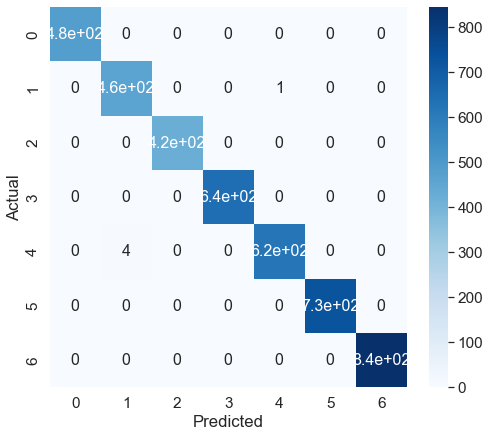

In [55]:
import seaborn as sn
import matplotlib.pyplot as plt
data=confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,7))
sn.set(font_scale=1.4)#or label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})